# Chronic Kidney Disease Predictor

This notebook uses Machine learning models to predict the chronic kidney disease using python-based machine learning and data science libraries.

## 1. Problem Definition

Problem is to explore if a patient has chronic kidney disease or not!

## 2. Data

The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. Use machine learning techniques to predict if a patient is suffering from a chronic kidney disease or not.
Original dataset can be acquired from the link Chronic KIdney Disease (https://www.kaggle.com/mansoordaku/ckdisease)

## 3. Evaluation
The goal is to train model to provide more that 90% or more than that of accuracy.

## 4. Feature

We use the following representation to collect the dataset:-

* age - age
* bp - blood pressure
* sg - specific gravity
* al - albumin
* su - sugar
* rbc - red blood cells
* pc - pus cell
* pcc - pus cell clumps
* ba - bacteria
* bgr - blood glucose random
* bu - blood urea
* sc - serum creatinine
* sod - sodium
* pot - potassium
* hemo - hemoglobin
* pcv - packed cell volume
* wc - white blood cell count
* rc - red blood cell count
* htn - hypertension
* dm - diabetes mellitus
* cad - coronary artery disease
* appet - appetite
* pe - pedal edema
* ane - anemia
* class - class

We use 24 + class = 25 ( 11 numeric ,14 nominal)

* Age(numerical) - age in years
* Blood Pressure(numerical) - bp in mm/Hg
* Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)
* Albumin(nominal) - al - (0,1,2,3,4,5)
* Sugar(nominal) - su - (0,1,2,3,4,5)
* Red Blood Cells(nominal) - rbc - (normal,abnormal)
* Pus Cell (nominal) - pc - (normal,abnormal)
* Pus Cell clumps(nominal) - pcc - (present,notpresent)
* Bacteria(nominal) - ba - (present,notpresent)
* Blood Glucose Random(numerical) - bgr in mgs/dl
* Blood Urea(numerical) -bu in mgs/dl
* Serum Creatinine(numerical) - sc in mgs/dl
* Sodium(numerical) - sod in mEq/L
* Potassium(numerical) - pot in mEq/L
* Hemoglobin(numerical) - hemo in gms
* Packed Cell Volume(numerical)
* White Blood Cell Count(numerical) - wc in cells/cumm
* Red Blood Cell Count(numerical) - rc in millions/cmm
* Hypertension(nominal) - htn - (yes,no)
* Diabetes Mellitus(nominal) - dm - (yes,no)
* Coronary Artery Disease(nominal) - cad - (yes,no)
* Appetite(nominal) - appet - (good,poor)
* Pedal Edema(nominal) - pe - (yes,no)
* Anemia(nominal) - ane - (yes,no)
* Class (nominal)- class - (ckd,notckd)

### Preparing the data

In [2]:
# Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

# Importing the data as dataframe
df = pd.read_csv("datasets/kidney_disease_train.csv")

In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,157,109,17,347,24,175,351,332,167,245
age,62.0,54.0,47.0,43.0,42.0,60.0,29.0,34.0,34.0,48.0
bp,70.0,70.0,80.0,60.0,100.0,50.0,80.0,70.0,70.0,100.0
sg,1.025,NaN,NaN,1.025,1.015,1.01,1.02,1.025,1.02,NaN
al,3.0,NaN,NaN,0.0,4.0,0.0,0.0,0.0,0.0,NaN
su,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
rbc,normal,NaN,NaN,normal,normal,NaN,normal,normal,abnormal,NaN
pc,abnormal,NaN,NaN,normal,abnormal,normal,normal,normal,normal,NaN
pcc,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
ba,notpresent,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,notpresent


In [6]:
df.classification.value_counts()

ckd       174
notckd    106
Name: classification, dtype: int64

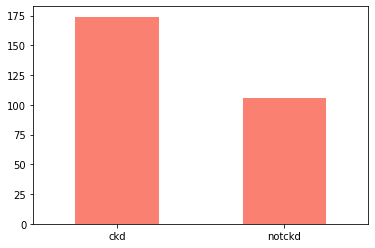

In [30]:
# Creating a graph to visualize the target feature 
df.classification.value_counts().plot.bar(color=["salmon"])
plt.xticks(rotation=0);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [13]:
# Removing id column as it's just a random index no. 
df = df.drop("id", axis=1)

In [16]:
df.head().T

,0,1,2,3,4
age,62.0,54.0,47.0,43.0,42.0
bp,70.0,70.0,80.0,60.0,100.0
sg,1.025,NaN,NaN,1.025,1.015
al,3.0,NaN,NaN,0.0,4.0
su,0.0,NaN,NaN,0.0,0.0
rbc,normal,NaN,NaN,normal,normal
pc,abnormal,NaN,NaN,normal,abnormal
pcc,notpresent,notpresent,notpresent,notpresent,notpresent
ba,notpresent,notpresent,notpresent,notpresent,present
bgr,122.0,233.0,114.0,108.0,NaN


In [19]:
df.size

7000

In [31]:
# Checking the missing values
df.isna().sum()

age                 5
bp                  9
sg                 36
al                 35
su                 38
rbc               107
pc                 50
pcc                 4
ba                  4
bgr                33
bu                 14
sc                 12
sod                67
pot                68
hemo               39
pcv                51
wc                 77
rc                 93
htn                 1
dm                  1
cad                 1
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [33]:
# Turning the string values into categorical values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("")

rbc
pc
pcc
ba
wc
rc
htn
dm
cad
appet
pe
ane
classification


In [ ]:
# Filling the numeric missing values with median of the feature values
